In [130]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [131]:
accidents = pd.read_csv('/Users/rakanalharbi/Downloads/Accidents0515.csv',index_col='Accident_Index')
casualties=pd.read_csv('/Users/rakanalharbi/Downloads/Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles=pd.read_csv('/Users/rakanalharbi/Downloads/Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
general_info = pd.read_csv('/Users/rakanalharbi/Downloads/ukTrafficAADF.csv')

In [132]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [134]:
accidents = accidents.join(vehicles, how='outer')

In [135]:
accidents.Accident_Severity.value_counts()

3    2711463
2     393319
1      39699
Name: Accident_Severity, dtype: int64

In [136]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

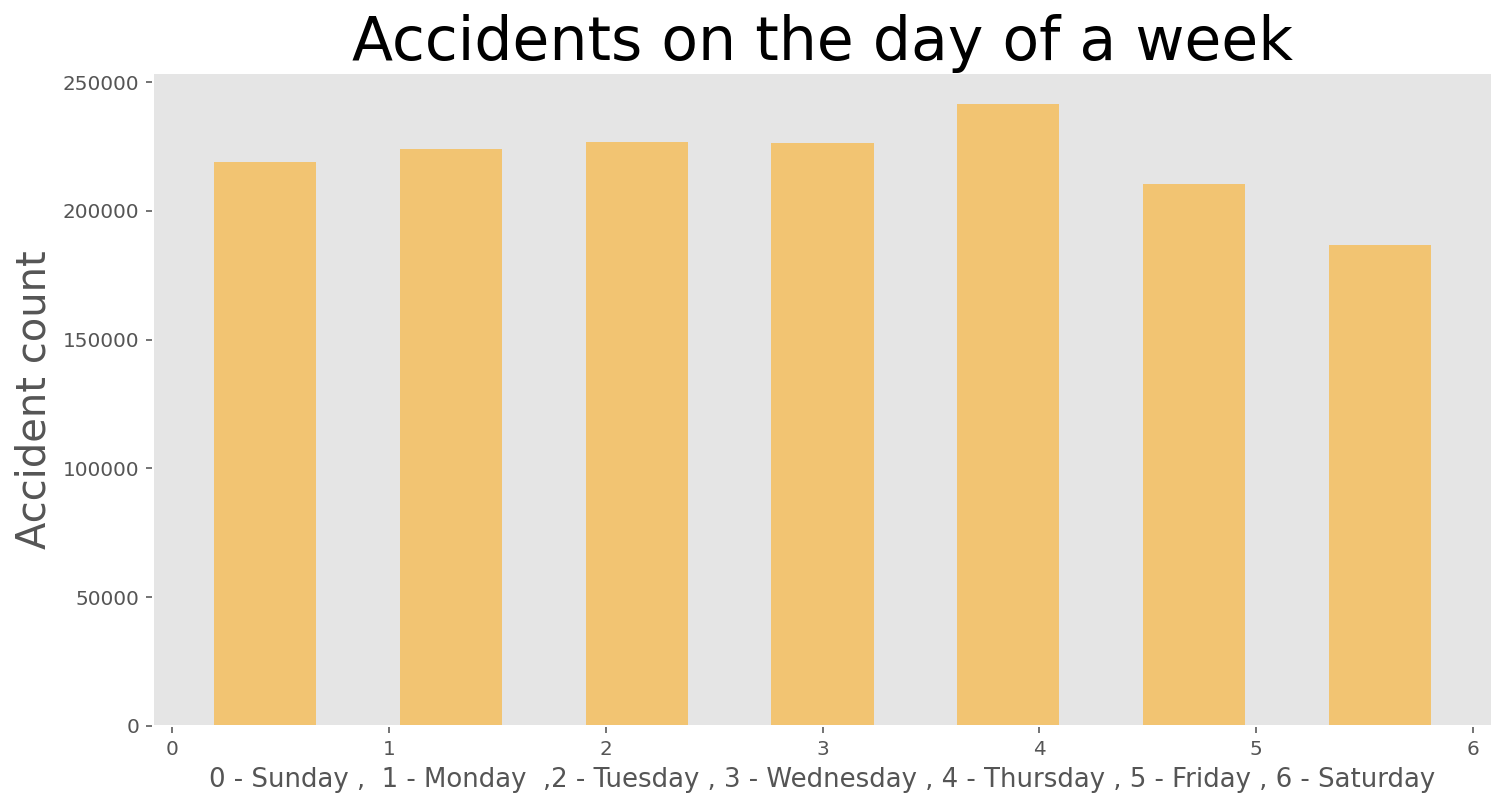

In [137]:
# find out the number of accidents on the days of a week.
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

Text(0, 0.5, 'Accident count')

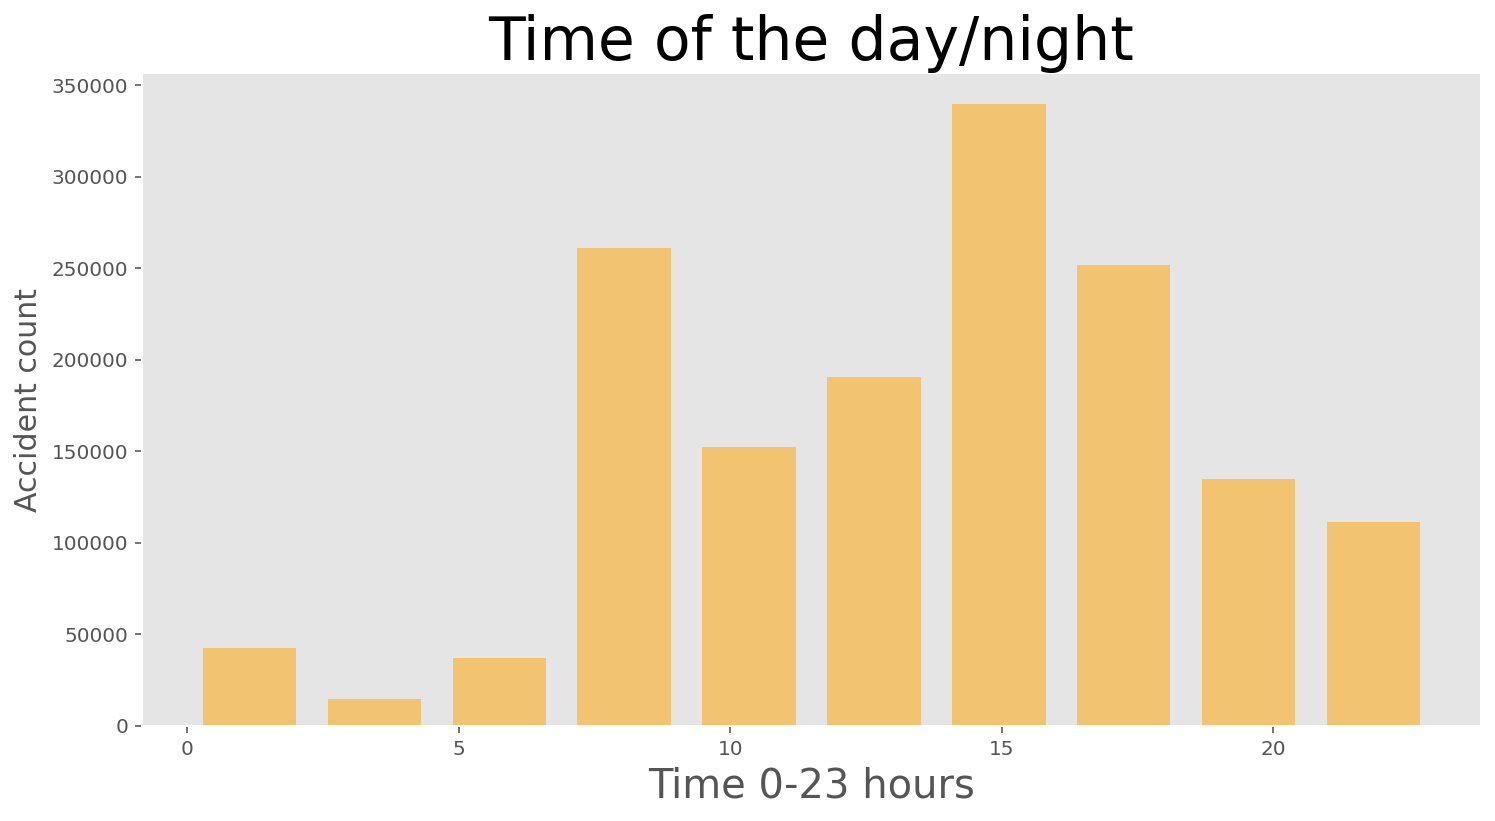

In [138]:
# We can find out about the accidents number using hours of the day.
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

Text(0.5, 0, 'Age of Drivers')

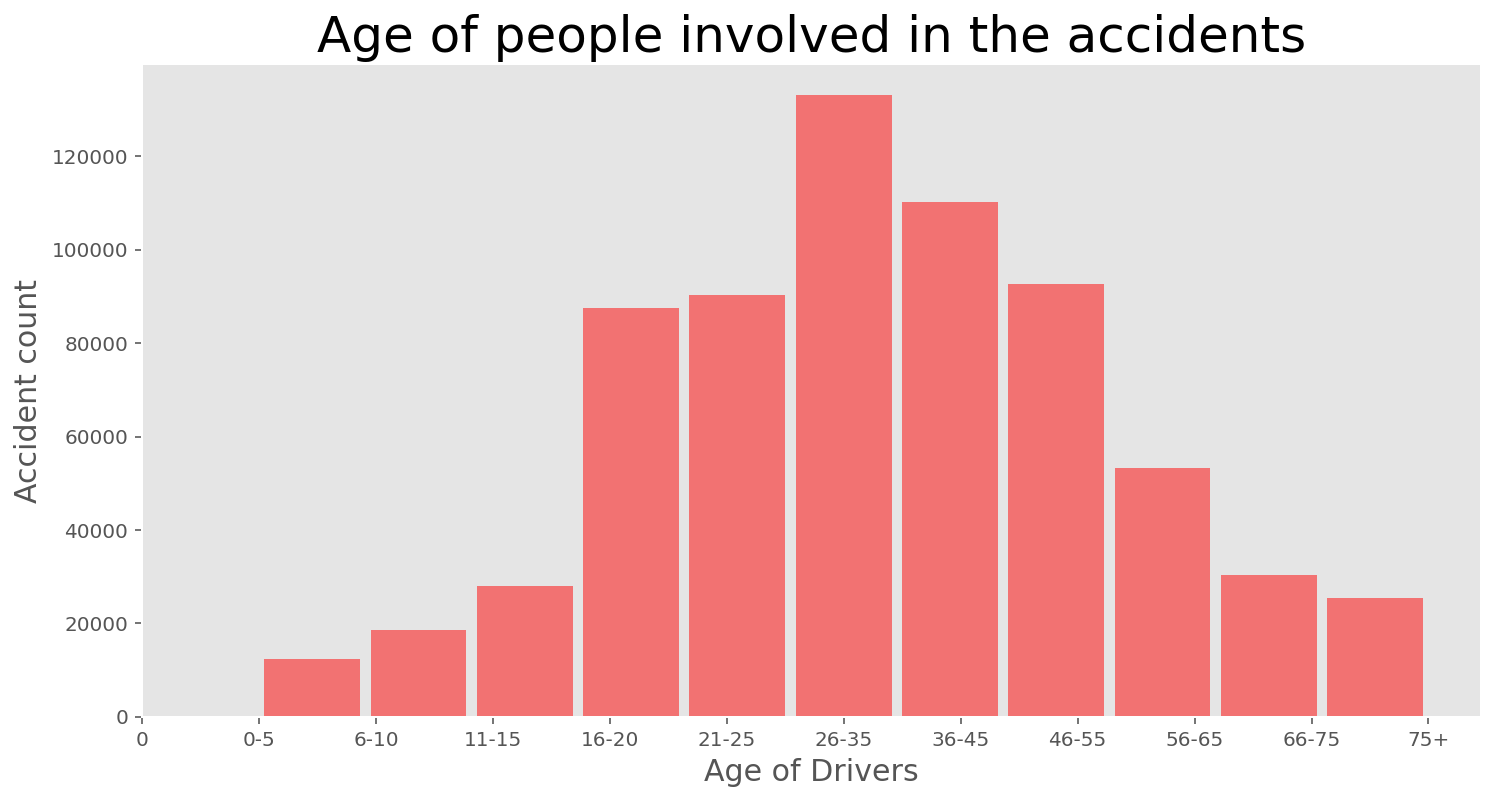

In [139]:
# Finding out about the age of driver can tell us more about the accidents
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

<AxesSubplot:>

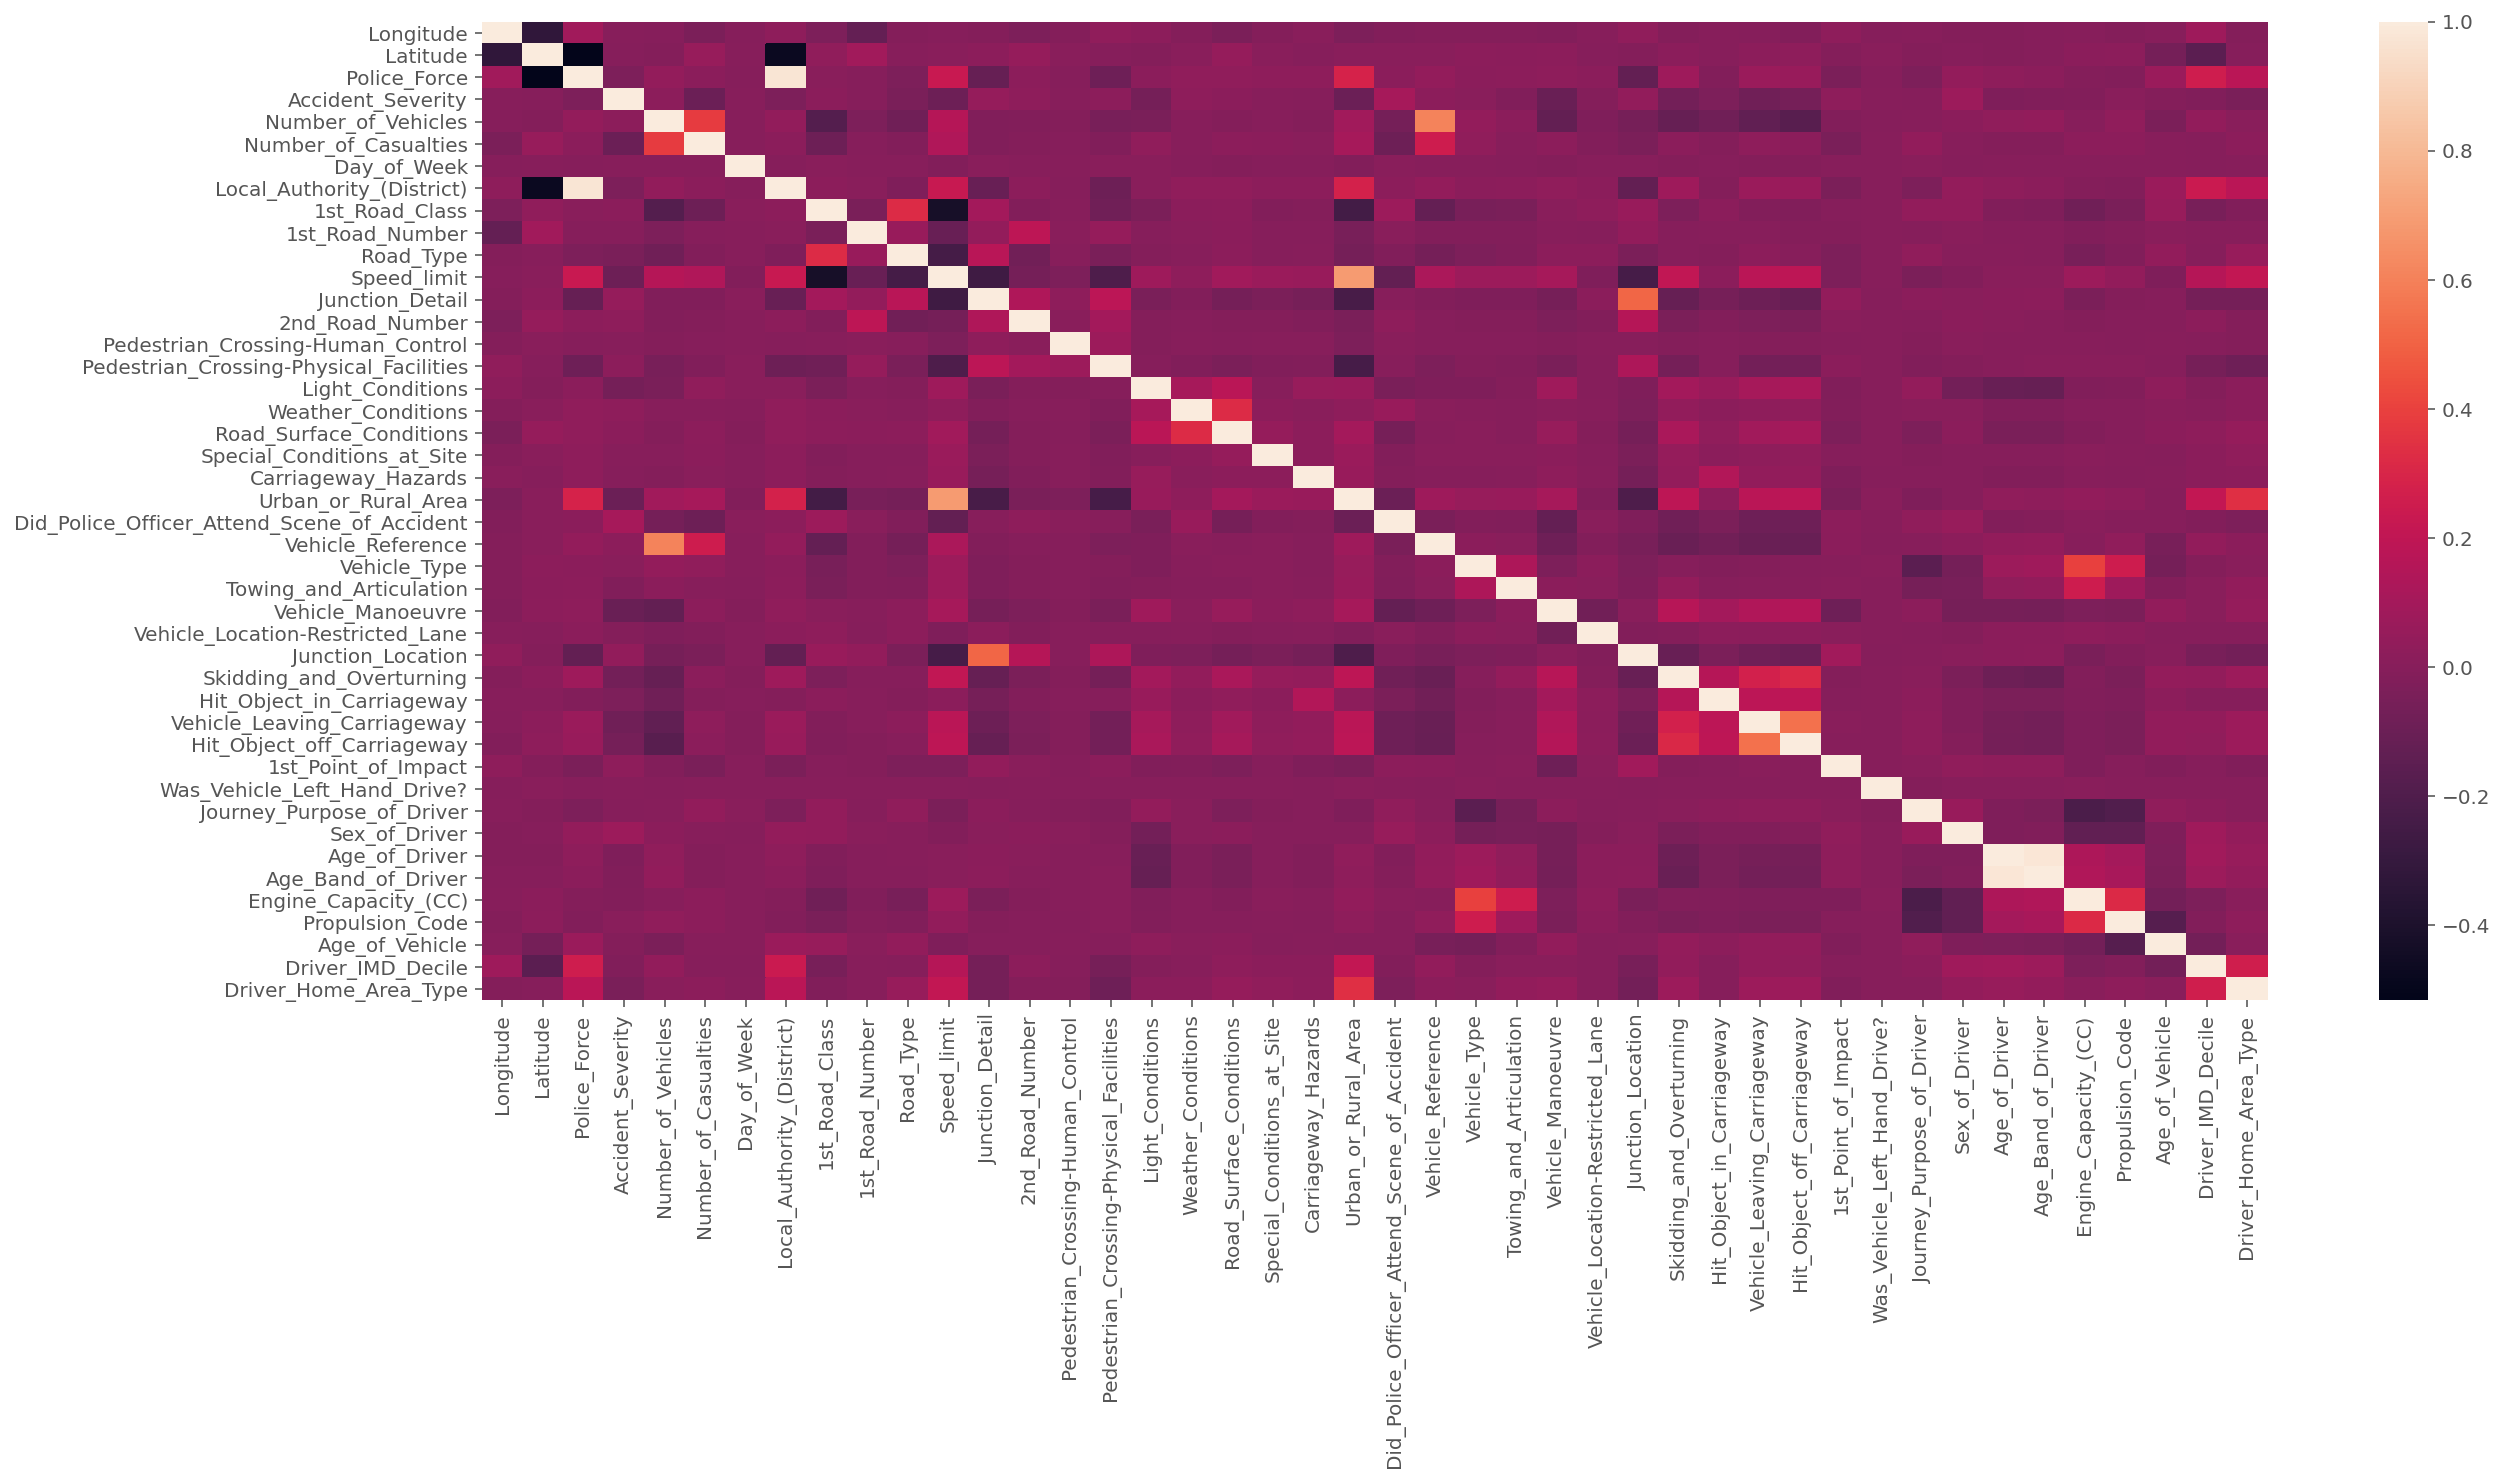

In [140]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

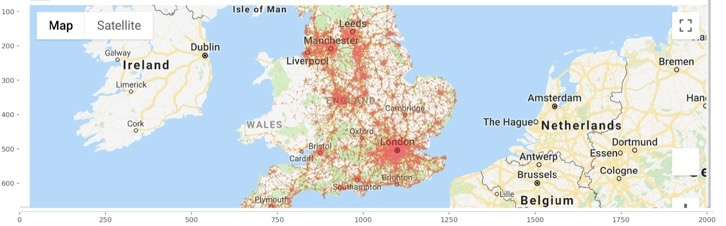

In [141]:
# Plotting accidents Location on Google Maps
from IPython.display import Image
Image("/Users/rakanalharbi/Desktop/Image.png")

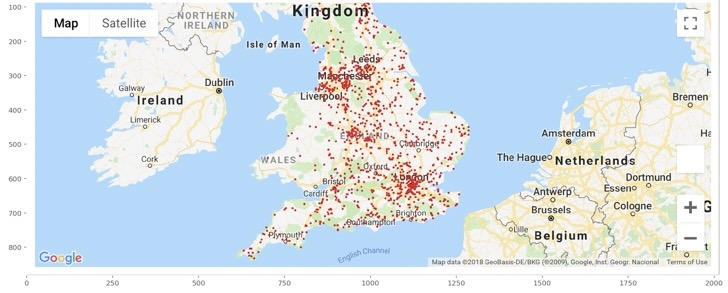

In [142]:
# Plotting accidents Location on Google Maps
from IPython.display import Image
Image("/Users/rakanalharbi/Desktop/Image2.png")

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

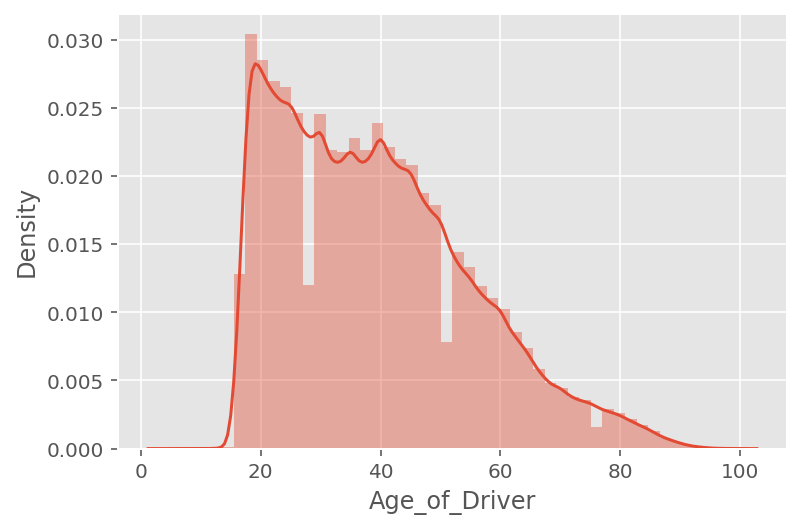

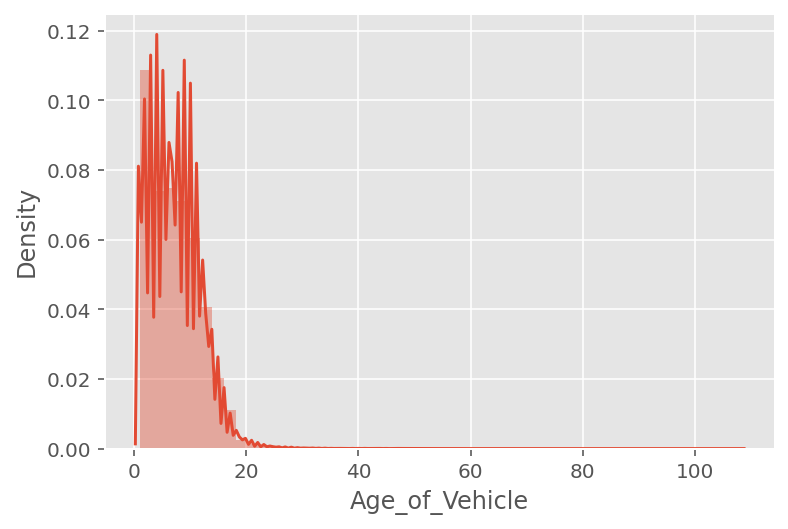

<Figure size 432x288 with 0 Axes>

In [144]:
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

In [145]:
from imblearn.over_sampling import SMOTE
ms=SMOTE(random_state=1)

In [146]:
X = accidents.loc[:,('Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit')]#loc vs iloc: must convert the boolean Series into a numpy array. loc gets rows (or columns) with particular labels from the index. iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
y = accidents.loc[:,('Accident_Severity')]
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
print(X_train.shape)
print(y_train.shape)
#linreg = LinearRegression()
#model = linreg.fit(x_train,y_train)

(1534792, 11)
(1534792,)
(1227833, 11)
(1227833,)


In [152]:
lr = LogisticRegression(intercept_scaling=3)
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 86.36
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000      4083
           2   0.083333  0.000026  0.000053     37759
           3   0.863691  0.999951  0.926840    265117

    accuracy                       0.863650    306959
   macro avg   0.315675  0.333326  0.308964    306959
weighted avg   0.756211  0.863650  0.800508    306959



Predicted,1,2,3,All
Actual,,,,
1,0,0,4083,4083
2,2,1,37756,37759
3,2,11,265104,265117
All,4,12,306943,306959


In [153]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 85.87
              precision    recall  f1-score   support

           1   0.155172  0.002204  0.004347      4083
           2   0.322172  0.043063  0.075971     37759
           3   0.867817  0.988069  0.924047    265117

    accuracy                       0.858711    306959
   macro avg   0.448387  0.344445  0.334788    306959
weighted avg   0.791218  0.858711  0.807492    306959



Predicted,1,2,3,All
Actual,,,,
1,9,288,3786,4083
2,19,1626,36114,37759
3,30,3133,261954,265117
All,58,5047,301854,306959


In [154]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 84.74
              precision    recall  f1-score   support

           1   0.031936  0.003919  0.006981      4083
           2   0.233811  0.057470  0.092262     37759
           3   0.867941  0.972899  0.917428    265117

    accuracy                       0.847403    306959
   macro avg   0.377896  0.344762  0.338890    306959
weighted avg   0.778816  0.847403  0.803814    306959



Predicted,1,2,3,All
Actual,,,,
1,16,303,3764,4083
2,108,2170,35481,37759
3,377,6808,257932,265117
All,501,9281,297177,306959


In [156]:
# Decision Tree hyperparameters tuning
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 85.87
              precision    recall  f1-score   support

           1   0.120482  0.002449  0.004801      4083
           2   0.327660  0.044360  0.078141     37759
           3   0.867946  0.987922  0.924056    265117

    accuracy                       0.858747    306959
   macro avg   0.438696  0.344911  0.335666    306959
weighted avg   0.791544  0.858747  0.807773    306959



Predicted,1,2,3,All
Actual,,,,
1,10,275,3798,4083
2,33,1675,36051,37759
3,40,3162,261915,265117
All,83,5112,301764,306959


In [157]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [158]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [4, 5],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
random_f = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = random_f, param_distributions = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [4, 5],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

<AxesSubplot:>

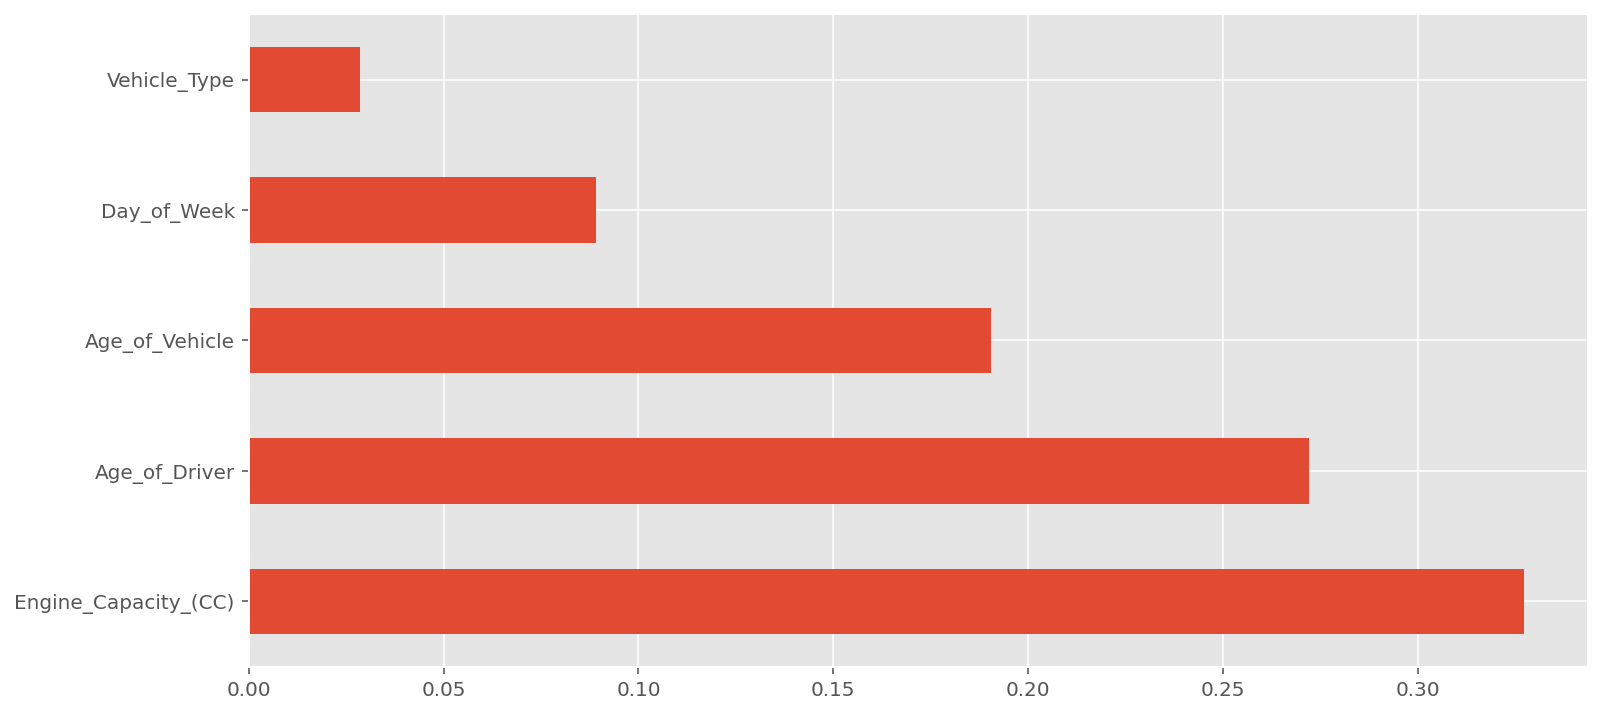

In [159]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [160]:
Y_pred = grid_search.predict(X_test)
acc_random_forest1 = round(grid_search.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 86.37
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000      4083
           2   0.455069  0.020922  0.040005     37759
           3   0.866068  0.997084  0.926970    265117

    accuracy                       0.863744    306959
   macro avg   0.440379  0.339335  0.322325    306959
weighted avg   0.803991  0.863744  0.805534    306959



Predicted,2,3,All
Actual,,,
1,173,3910,4083
2,790,36969,37759
3,773,264344,265117
All,1736,305223,306959
